# Modelos de Ensamble para Clasificación

Para este ejercicio volveremos a usar el código usado en la clase 10


<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/1.png?raw=true'>

Vamos a trabajar con el conjunto de datos **"Titanic"**.

El objetivo de este proyecto es crear un modelo que pueda **predecir si una persona sobrevivirá o no al hundimiento del Titanic**, dado sus factores de riesgo (como la clase en la que viajaba, su edad, sexo, cantidad de familiares a bordo, etc.).

Este problema puede resolverse construyendo un **modelo de clasificación** que tome como entrada variables como edad, sexo, clase, número de familiares a bordo, y prediga la probabilidad de supervivencia como salida.

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/2.pmg.png?raw=true'>

# Obtener datos

In [33]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

| **Nombre de la Columna** | **Descripción** |
|--------------------------|-----------------|
| `PassengerId`   | ID único para cada pasajero. |
| `Survived`      | Supervivencia (0 = No, 1 = Sí). |
| `Pclass`        | Clase del billete (1 = 1ra clase, 2 = 2da clase, 3 = 3ra clase). |
| `Name`          | Nombre del pasajero. |
| `Sex`           | Género del pasajero (male = hombre, female = mujer). |
| `Age`           | Edad del pasajero en años. |
| `SibSp`         | Número de hermanos/esposos a bordo del Titanic. |
| `Parch`         | Número de padres/hijos a bordo del Titanic. |
| `Ticket`        | Número del billete. |
| `Fare`          | Tarifa pagada por el billete. |
| `Cabin`         | Número de cabina. |
| `Embarked`      | Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton). |


In [3]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
398,399,0,2,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
629,630,0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S


# Análisis Exploratorio de Datos

El objetivo de hacer Análisis Exploratorio de Datos (EDA) en un modelo de machine learning es comprender mejor los datos antes de aplicar cualquier modelo. Es una etapa crítica que te permite identificar patrones, detectar errores, y formular hipótesis sobre las relaciones entre las variables, todo lo cual ayuda a preparar los datos adecuadamente para el modelado.

In [4]:
print("\nNúmero de filas y columnas del dataset:")
print(df.shape)


Número de filas y columnas del dataset:
(891, 12)


In [5]:
print("\nResumen de la información del dataset:")
print(df.info())


Resumen de la información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
# Contar valores faltantes
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:
print("\nEstadísticas descriptivas de las variables numéricas:")
df.describe()


Estadísticas descriptivas de las variables numéricas:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print("\nEstadísticas descriptivas de las variables categóricas:")
df.describe(include=['object', 'category'])


Estadísticas descriptivas de las variables categóricas:


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


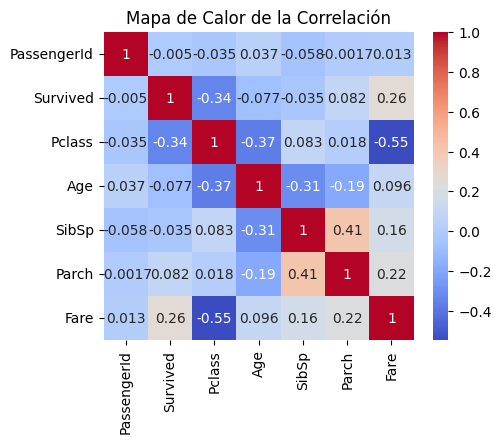

In [9]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Crear el mapa de calor con las columnas numéricas
plt.figure(figsize=(5, 4))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de la Correlación')
plt.show()

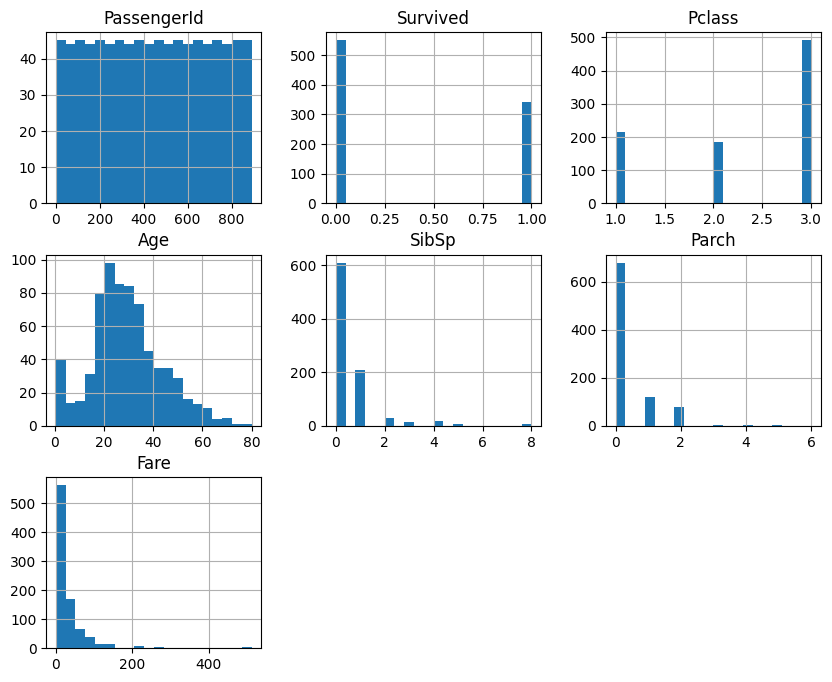

In [10]:
# Crear histogramas para variables numéricas
df_numeric.hist(bins=20, figsize=(10, 8))
plt.show()

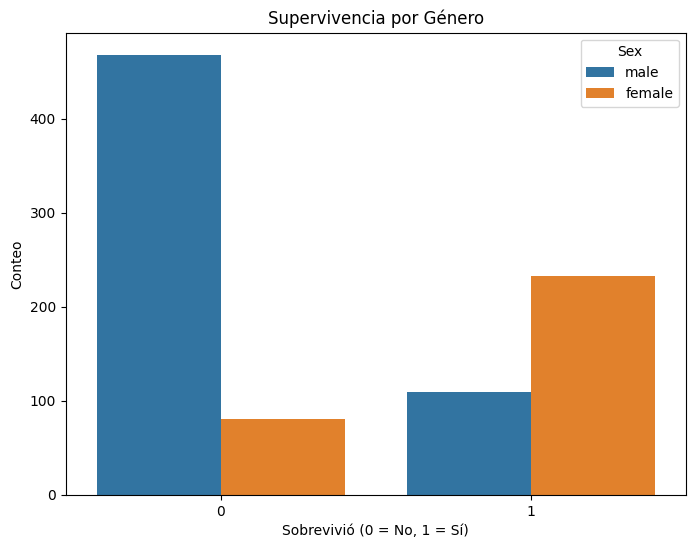

In [11]:
# Gráfico de barras para ver la relación entre el género y la supervivencia
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Supervivencia por Género')
plt.xlabel('Sobrevivió (0 = No, 1 = Sí)')
plt.ylabel('Conteo')
plt.show()

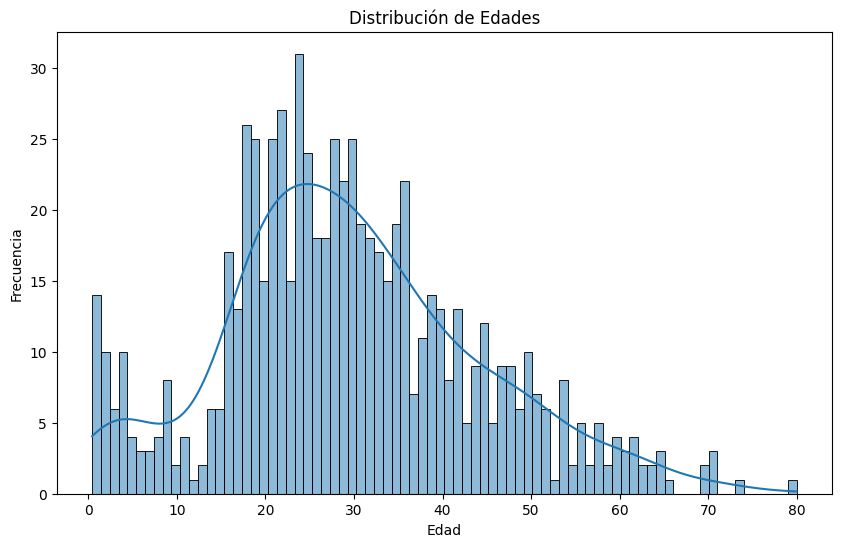

In [12]:
# Visualizar la distribución de edades en el Titanic
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=80, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

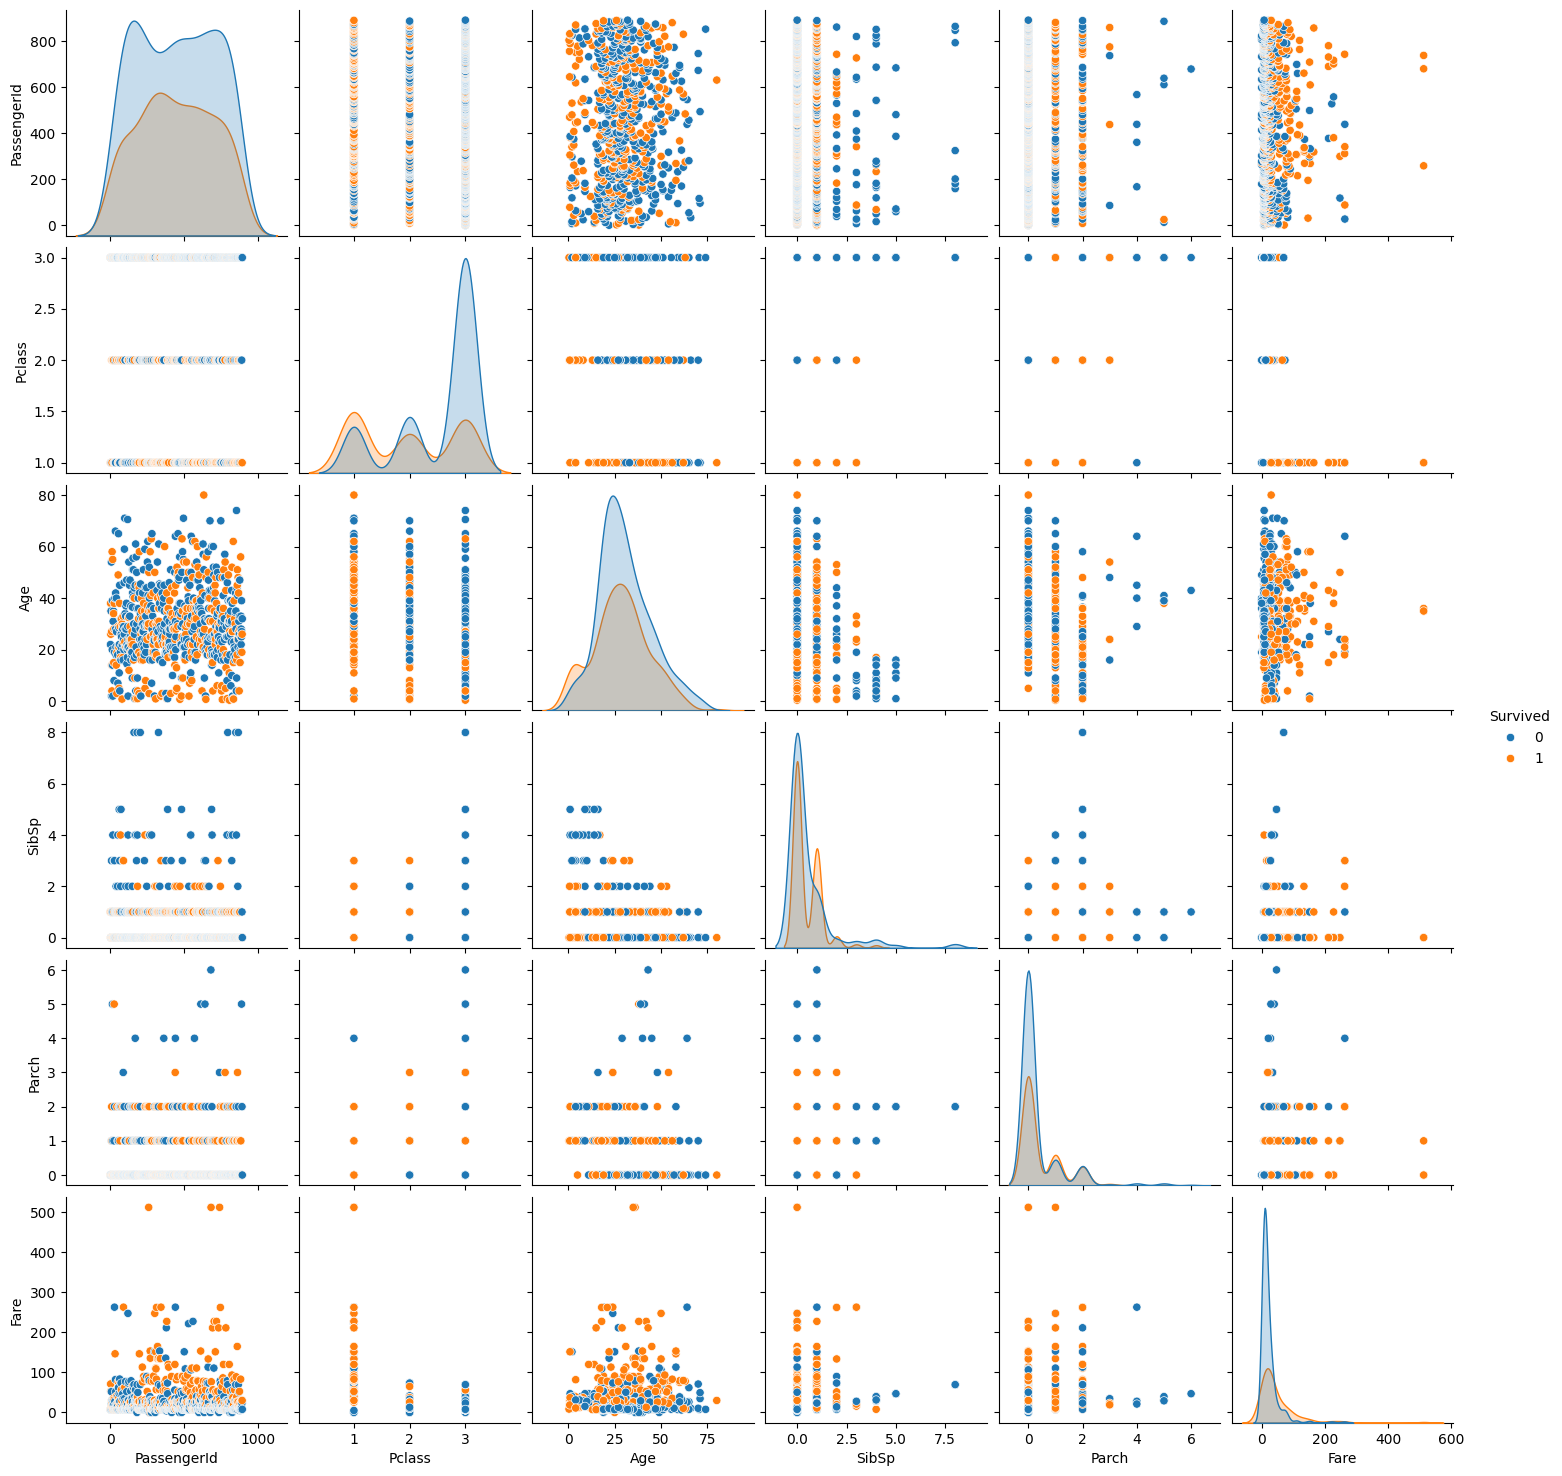

In [13]:
# Crear un pairplot para todas las variables numéricas, coloreando por la variable 'Survived'
sns.pairplot(df, hue='Survived')
plt.show()

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/3.png?raw=true'>

In [14]:
columnas_no_utiles = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_nuevo = df.drop(columns=columnas_no_utiles) # Quitando columnas no útiles
df_nuevo = df_nuevo.dropna(subset=['Embarked']) # Luego, elimina las filas donde 'Embarked' sea null
df_nuevo.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# ⚠️ Dividir datos en entrenamiento (train) y prueba (test) ⚠️

Es **crucial** dividir los datos en conjuntos de entrenamiento y prueba **ANTES** de realizar cualquier ingeniería de características o entrenar el modelo.

Si transformas los datos antes de hacer la división, puedes permitir que información del conjunto de prueba se mezcle con los datos de entrenamiento. Esto provoca un sobreajuste, donde el modelo parece funcionar muy bien, pero en realidad no refleja su rendimiento en datos nuevos o desconocidos.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [16]:
# Definir las características (X) y la variable objetivo (y)
X = df_nuevo.drop(columns=['Survived'])  # Aquí estamos eliminando la columna objetivo
y = df_nuevo['Survived']  # Esta es nuestra variable objetivo

In [17]:
# Dividir el conjunto de datos en entrenamiento (train) y prueba (test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Ver el tamaño de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}. Tamaño de las etiquetas de entrenamiento: {y_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}. Tamaño de las etiquetas de prueba: {y_test.shape}")

Tamaño del conjunto de entrenamiento: (711, 7). Tamaño de las etiquetas de entrenamiento: (711,)
Tamaño del conjunto de prueba: (178, 7). Tamaño de las etiquetas de prueba: (178,)


# Ingeniería de características

- La ingeniería de características es el proceso de convertir los datos en bruto en características o variables que un modelo de Machine Learning pueda utilizar eficazmente para hacer predicciones.

- Estas características son los valores que el modelo usa como entradas, por lo que crear características de calidad puede mejorar considerablemente el rendimiento del modelo.

  - Para las **características categóricas**, es **obligatorio** transformarlas antes de usarlas en el modelo. Esto se debe a que los modelos de Machine Learning no pueden trabajar con texto o categorías directamente, por lo que es necesario convertirlas a una forma numérica (como con one-hot encoding o codificación ordinal).

  - Para las **características numéricas**, la transformación no es obligatoria, pero es recomendable. Normalizar o estandarizar las características numéricas puede mejorar la precisión y estabilidad del modelo, especialmente cuando las variables tienen magnitudes de valores muy diferentes.

In [19]:
# Define cuáles columnas son categoricas y cuáles son numéricas
categorical_columns = ['Sex', 'Embarked']
numerical_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [20]:
# Crea un preprocesador que aplique tanto la imputación como el escalado en las numéricas y la codificación one-hot en las categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación usando la media
            ('scaler', StandardScaler())  # Estandarización de las columnas numéricas
        ]), numerical_columns),  # Pipeline para las numéricas

        ('cat', OneHotEncoder(), categorical_columns)  # Codificación one-hot para las categóricas
    ])

- Usamos `fit_transform` ÚNICAMENTE en X_train para **aprender** los parámetros de la transformación.

- Usamos **solo** `transform` en X_test para **aplicar** esas mismas transformaciones, sin recalcular los parámetros, garantizando que no haya fuga de datos y que el modelo **generalice** correctamente.

In [21]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [22]:
# Los nombres de las columnas numéricas columnas no cambian después de la transformación
nombres_columnas_numericas = numerical_columns

# El método get_feature_names_out genera los nombres de las nuevas columnas creadas por OneHotEncoder para las columnas categóricas
nombres_columnas_categoricas = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)

# Combinar los nombres de las columnas numéricas y categóricas en una lista
nombres_todas_las_columnas = list(nombres_columnas_numericas) + list(nombres_columnas_categoricas)

# Convertir la matriz en un DataFrame con los nombres de las columnas
X_train_processed_df = pd.DataFrame(X_train_processed, columns=nombres_todas_las_columnas)

X_train_processed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.617186,1.081894e+00,-0.483197,-0.451301,-0.069366,1.0,0.0,1.0,0.0,0.0
1,0.806037,-1.634943e+00,4.328472,2.045781,0.312067,0.0,1.0,0.0,0.0,1.0
2,0.806037,-6.258319e-01,-0.483197,-0.451301,-0.434721,0.0,1.0,0.0,0.0,1.0
3,0.806037,-1.945439e+00,3.366138,2.045781,0.003557,1.0,0.0,0.0,0.0,1.0
4,0.806037,-5.515511e-16,-0.483197,-0.451301,-0.463642,0.0,1.0,1.0,0.0,0.0


In [23]:
# Convertir la matriz en un DataFrame con los nombres de las columnas
X_test_processed_df = pd.DataFrame(X_test_processed, columns=nombres_todas_las_columnas)

X_test_processed_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,-1.617186,-4.705841e-01,-0.483197,-0.451301,0.363858,1.0,0.0,1.0,0.0,0.0
1,-0.405574,3.056551e-01,-0.483197,0.797240,-0.163252,1.0,0.0,0.0,0.0,1.0
2,-0.405574,-2.023063e+00,0.479137,0.797240,-0.163252,1.0,0.0,0.0,0.0,1.0
3,-1.617186,-5.515511e-16,-0.483197,-0.451301,-0.010200,0.0,1.0,1.0,0.0,0.0
4,0.806037,-1.091575e+00,3.366138,0.797240,0.168626,0.0,1.0,0.0,0.0,1.0


<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/4.png?raw=true'>

# Modelos de clasificación

En machine learning, es común entrenar varios modelos que sean apropiados para la tarea en cuestión (en este caso, clasificación) y luego elegir el mejor modelo basado en su rendimiento.

Esta vez entrenaremos:
- Regresión logística
- Máquina de vectores de soporte (SVM)
- Clasificador bayesiano ingenuo (Naive Bayes)
- K-Vecinos Cercanos (KNN)
- Árbol de Decisión
- Random Forest (Ensamble)
- Gradient Boosting (Ensamble)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
# Crear una lista de modelos con los que vamos a trabajar
modelos = {
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # Puedes ajustar el número de vecinos
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [26]:
for nombre_modelo, modelo in modelos.items():
  modelo.fit(X_train_processed, y_train)

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/5.png?raw=true'>

# Evaluación del modelo

Para evaluar el rendimiento del modelo, primero necesitamos usarlo para hacer **predicciones** en el conjunto de datos de prueba. Luego, compararemos estas predicciones con los valores reales de nuestro conjunto de prueba para medir qué tan bien está funcionando el modelo. Esto nos dará una idea clara de su capacidad para **generalizar** a nuevos datos.

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [28]:
# Crear un diccionario de métricas para almacenar resultados
resultados = {}

for nombre_modelo, modelo in modelos.items():
  # Predecir en el conjunto de prueba
  y_pred = modelo.predict(X_test_processed)

  # Calcular las métricas
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  matriz_confusion = confusion_matrix(y_test, y_pred)

  # Guardar los resultados en un diccionario
  resultados[nombre_modelo] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Confusion Matrix': matriz_confusion
    }

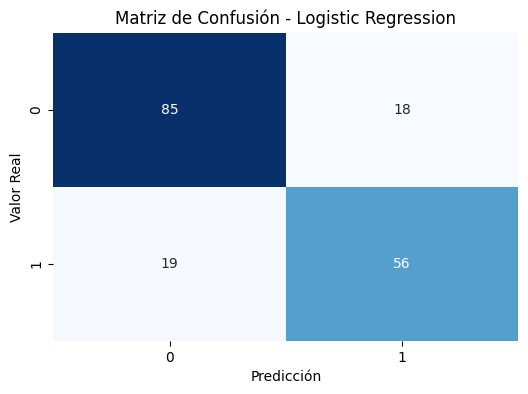

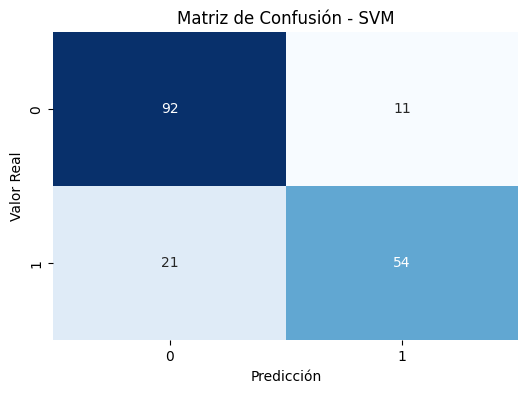

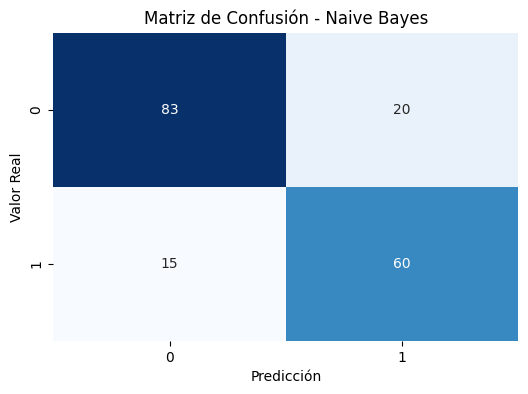

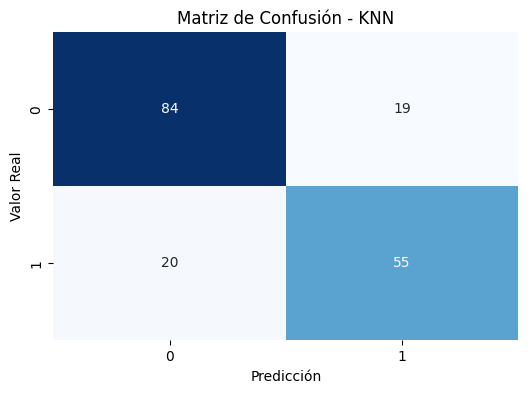

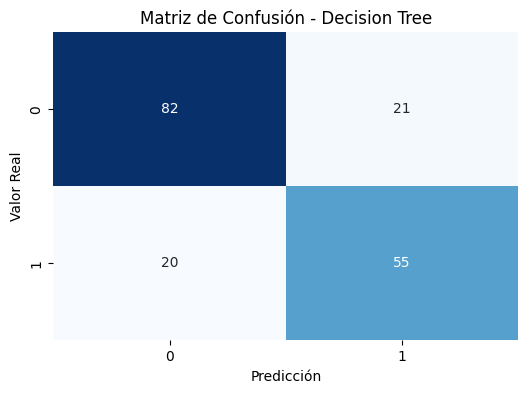

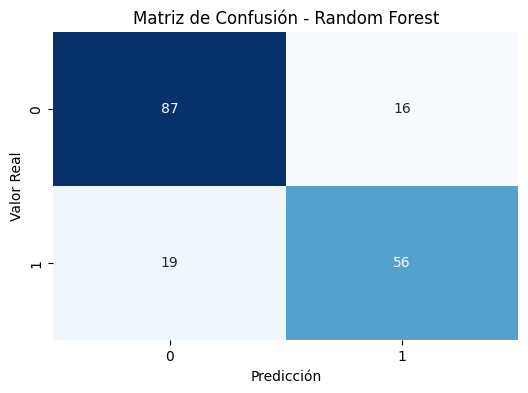

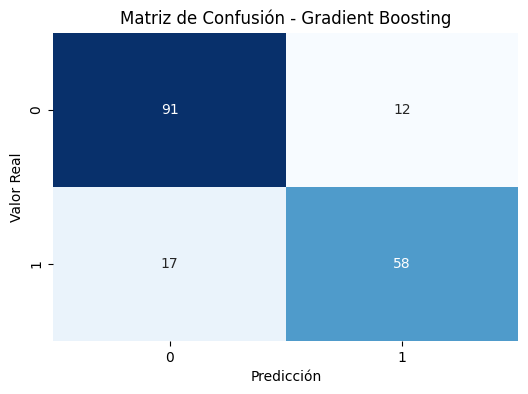

In [29]:
for nombre_modelo, metricas in resultados.items():
    # Obtener la matriz de confusión del diccionario
    matriz_confusion = metricas['Confusion Matrix']

    plt.figure(figsize=(6,4))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Matriz de Confusión - {nombre_modelo}")
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

In [30]:
df_metricas = pd.DataFrame(resultados).T.drop(columns='Confusion Matrix')

df_metricas.sort_values(['F1-Score'], ascending=[False])

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting,0.837079,0.828571,0.773333,0.8
Naive Bayes,0.803371,0.75,0.8,0.774194
SVM,0.820225,0.830769,0.72,0.771429
Random Forest,0.803371,0.777778,0.746667,0.761905
Logistic Regression,0.792135,0.756757,0.746667,0.751678
KNN,0.780899,0.743243,0.733333,0.738255
Decision Tree,0.769663,0.723684,0.733333,0.728477


Definición de clases:
- **Verdadero Positivo** (True Positive) ocurre cuando el modelo predice que alguien sobrevive (predicción = 1), y esa persona realmente sobrevive (valor real = 1).
- **Verdadero Negativo** (True Negative) ocurre cuando el modelo predice que alguien no sobrevive (predicción = 0), y esa persona realmente no sobrevive (valor real = 0).
- **Falso Positivo** (False Positive) ocurre cuando el modelo predice que alguien sobrevive (predicción = 1), pero esa persona realmente no sobrevive (valor real = 0).
- **Falso Negativo** (False Negativo) ocurre cuando el modelo predice que alguien no sobrevive (predicción = 0), pero esa persona realmente sobrevive (valor real = 1).



---

## Escoger el mejor modelo usando las métricas de rendimiento


En este caso, el **Gradient Boosting** es la mejor opción, y aque tiene el mejor puntaje de F1, lo que indica que es el modelo que mejor predice la supervivencia de los pasajeros en el conjunto de datos del Titanic.

Vamos a interpretar cada una en un contexto de negocios:

- **Exactitud (accuracy)**: La exactitud mide el porcentaje de predicciones correctas sobre el total de las predicciones. Un valor más alto de exactitud indica que el modelo clasifica correctamente una mayor proporción de instancias. El Gradient Boosting tiene una accuracy de 0.837, lo que significa que el modelo clasifica correctamente aproximadamente el 83.7% de los pasajeros.

- **Precisión**: La precisión te dice, de todas las veces que el modelo predijo que un pasajero iba a sobrevivir, ¿en cuántos casos acertó realmente? En otras palabras, si el modelo dice que alguien sobrevivió, ¿qué tan seguro puedes estar de que es verdad? En el caso del Gradient Boosting, de todas las personas que el modelo predijo que sobrevivieron, el 82.8% efectivamente sobrevivió.

- **Sensibilidad (recall)**:  La sensibilidad te dice, de todos los pasajeros que realmente sobrevivieron, ¿a cuántos logró encontrar el modelo? Es decir, de las personas que sobrevivieron en la vida real, ¿cuántas veces el modelo acertó en identificarlas? El Gradient Boosting logró identificar correctamente al 77.3% de las personas que realmente sobrevivieron.

- **F1**: El F1-Score es la media armónica entre precisión y recall, y es útil cuando se necesita un balance entre ambas métricas. Un valor más alto de F1-Score indica un mejor equilibrio entre precisión y sensibilidad. El Gradient Boosting tiene un F1-Score de 0.8, lo que indica un buen balance entre las predicciones correctas y la detección de pasajeros que realmente sobrevivieron.

<img src='https://github.com/vivianamarquez/unicomfacauca-ai-2024/blob/main/imagenes/pasos/6.png?raw=true'>

# Interpretando el modelo

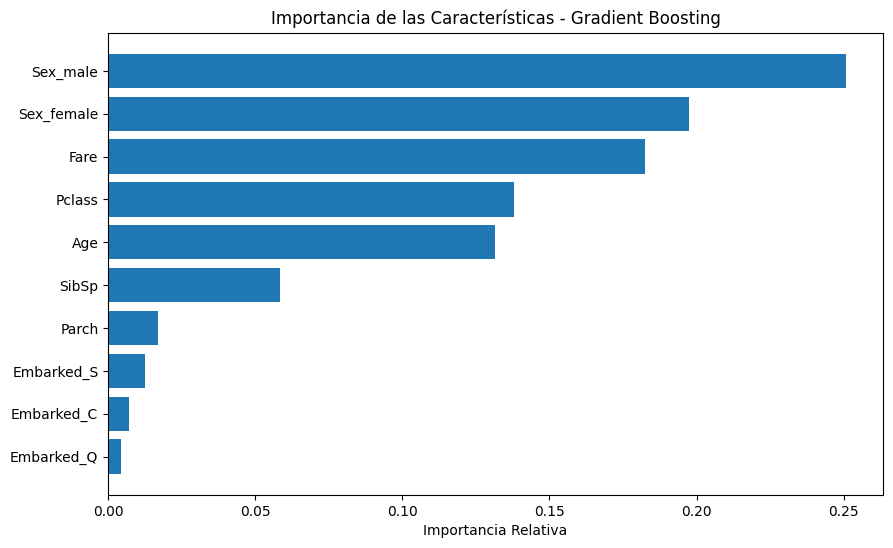

In [34]:
# Obtenemos la importancia de las características del modelo de Gradient Boosting
importancia_caracteristicas = modelos['Gradient Boosting'].feature_importances_

# Ordenamos las características por importancia
indices = np.argsort(importancia_caracteristicas)

# Graficamos la importancia de las características
plt.figure(figsize=(10, 6))
plt.title('Importancia de las Características - Gradient Boosting')
plt.barh(range(X_train_processed_df.shape[1]), importancia_caracteristicas[indices])
plt.yticks(range(X_train_processed_df.shape[1]), X_train_processed_df.columns[indices])
plt.xlabel('Importancia Relativa')
plt.show()

# Recomendaciones y conclusiones


Las características más importantes para predecir la supervivencia en el Titanic están relacionadas con el sexo, la tarifa pagada (Fare), la clase del pasajero (Pclass) y la edad. Las empresas (como líneas de cruceros o aseguradoras) pueden utilizar esta información para tomar decisiones estratégicas y de negocio:

1. Sexo: El género es el factor más importante. En este caso, ser hombre está asociado con una menor probabilidad de supervivencia, mientras que ser mujer se relaciona con una mayor probabilidad de sobrevivir. Las empresas de transporte marítimo o líneas de cruceros podrían usar esta información para ajustar políticas de evacuación, asegurando que las mujeres y los niños reciban prioridad en situaciones de emergencia, dado su historial de supervivencia.

2. Tarifa (Fare) y Clase (Pclass): Los pasajeros que pagaron más y viajaban en clases más altas tenían más probabilidades de sobrevivir. Esto sugiere que hay una diferencia significativa en el trato o el acceso a recursos de emergencia en función de la clase. Las aseguradoras podrían ajustar las primas para los pasajeros de clase alta o media según el riesgo estimado basado en su clase de viaje.

3. Edad: Aunque es menos influyente que el sexo o la clase, la edad también juega un papel importante en la predicción de la supervivencia. Generalmente, los pasajeros más jóvenes tenían mayores probabilidades de sobrevivir. Esta información podría ser usada por las compañías de seguros para ajustar las tarifas de los seguros de vida o viajes según la edad de los pasajeros.